### Explore the data-files in the repository and familiarize with pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Make a map that assigns the total number of memory operations per element to a given algorithm

In [2]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,'dz':3,
         'arakawa':34, 'cg':51, 'ds':83}

Now, let's read in one of the csv files (actually they are "whitespace seperated values") and compute the bandwidth from the time measurements, vector size and the memory operations

In [3]:
#read in csv file
df1 = pd.read_csv('benchmark_v100nv_mpi1.csv', delimiter=' ')
#add size and get rid of non-relevant columns
df1.insert(0,'size', 8*df1['n']*df1['n']*df1['Nx']*df1['Ny']*df1['Nz']/1e6)
for name, mem in memops.items():
    df1[name] = df1['size']/1000*mem/df1[name]
dfr = df1[['n','Nx','Ny','Nz','size']+list(memops.keys())]
dfr

,n,Nx,Ny,Nz,size,scal,axpby,pointwiseDot,dot,dx,dy,dz,arakawa,cg,ds
0,3,34,34,16,1.331712,565.098871,815.663472,994.850609,18.589593,486.771832,459.585042,565.270776,586.360973,235.847749,316.798019
1,3,34,34,32,2.663424,912.816119,1292.299033,675.544433,31.128767,701.571854,630.998586,846.392151,694.594862,376.351386,324.455509
2,3,34,34,64,5.326848,1267.241109,702.697863,734.297077,44.476202,626.926478,576.321979,637.147209,726.479659,481.203567,345.178187
3,3,34,34,128,10.653696,708.840533,758.232401,775.601137,58.219145,719.576914,662.569380,721.584904,808.996295,611.891793,346.698020
4,3,68,68,16,5.326848,1328.508634,700.747380,730.525796,98.461174,637.154830,566.768360,645.989142,723.435624,465.815601,395.980783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,4,136,136,128,303.038464,812.203658,845.869714,815.569563,587.642580,811.094609,641.785895,490.845936,849.575165,707.081431,NaN
316,4,272,272,16,151.519232,804.942901,842.836421,818.300412,528.102582,815.363290,646.935659,502.502461,848.898992,711.141864,NaN
317,4,272,272,32,303.038464,812.433382,847.889305,817.590251,586.051547,811.478320,646.693597,491.257054,850.451732,706.570674,NaN
318,4,272,272,64,606.076928,815.403147,846.834918,813.728145,610.509225,802.417886,654.138677,490.859187,850.715055,NaN,NaN


We want to aggregate the results with the same input parameters n, Nx, Ny, Nz

In [4]:
#compute mean and standard derivation of 'same' groups 
dfr=dfr.groupby(['n', 'Nx','Ny','Nz','size']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny','Nz','size'])

In [5]:
dfr['axpby']

,mean,std
0,822.288275,26.684597
1,1306.351748,9.930807
2,701.677757,4.150210
3,760.073196,1.276385
4,704.437164,3.597779
5,761.284339,1.384245
6,801.467979,1.081480
7,824.658905,0.864958
8,801.973367,1.128040
9,823.810900,0.598200


Here, we compute the efficiency of the operations

In [6]:
base_bandwidth = dfr[('axpby','mean')].iloc[15] # base bandwidth at 3 256 256 128
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'mean')]/base_bandwidth
    dfr[(name,'eff_err')]=dfr[(name,'std')]/base_bandwidth
#now display all bandwidth results

In [7]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','Nz','size']].join( dfr[cols])
cols=[(m,'eff_err') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [8]:
pd.set_option('precision',2)
efficiency=efficiency.sort_values(by='size')
#efficiency.loc[:,'size']
efficiency.iloc[0:20]

,n,Nx,Ny,Nz,size,scal,axpby,pointwiseDot,dot,dx,...,scal,axpby,pointwiseDot,dot,dx,dy,dz,arakawa,cg,ds
,,,,,,eff,eff,eff,eff,eff,...,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err
0,3,34,34,16,1.33,0.67,0.97,1.16,0.02,0.59,...,9.52e-03,3.15e-02,2.72e-02,8.96e-04,3.68e-02,3.48e-02,4.16e-02,2.44e-02,7.07e-03,1.09e-03
16,4,34,34,16,2.37,1.05,1.49,0.82,0.06,0.76,...,5.03e-02,7.21e-02,4.04e-03,1.08e-03,4.10e-02,3.38e-02,5.07e-02,1.96e-02,1.04e-02,3.35e-03
1,3,34,34,32,2.66,1.09,1.54,0.80,0.04,0.83,...,6.88e-03,1.17e-02,4.32e-03,1.34e-04,2.66e-03,2.06e-03,1.52e-02,1.71e-03,1.19e-03,9.24e-04
17,4,34,34,32,4.73,1.63,0.85,0.86,0.10,0.73,...,7.63e-02,6.42e-03,4.02e-03,2.10e-03,1.02e-02,1.09e-02,5.82e-03,8.98e-03,9.05e-03,3.55e-03
2,3,34,34,64,5.33,1.50,0.83,0.87,0.05,0.74,...,1.74e-02,4.91e-03,2.85e-03,1.06e-03,3.79e-03,3.93e-03,3.24e-03,2.89e-03,9.53e-03,8.55e-03
4,3,68,68,16,5.33,1.58,0.83,0.87,0.11,0.76,...,7.86e-03,4.25e-03,4.29e-03,4.31e-03,3.37e-03,3.29e-03,4.00e-03,2.34e-03,6.19e-04,1.71e-03
18,4,34,34,64,9.47,0.84,0.89,0.90,0.19,0.83,...,1.57e-03,2.38e-03,2.38e-03,3.37e-03,3.36e-03,4.24e-03,2.81e-03,2.60e-03,1.46e-03,4.64e-04
20,4,68,68,16,9.47,0.84,0.89,0.91,0.19,0.83,...,5.64e-04,1.27e-03,2.07e-03,3.62e-04,1.72e-03,1.58e-03,2.51e-03,1.18e-03,3.81e-03,2.18e-04
3,3,34,34,128,10.65,0.84,0.90,0.91,0.07,0.85,...,1.94e-03,1.51e-03,3.42e-03,1.09e-03,3.23e-03,5.60e-03,3.39e-03,2.34e-03,2.05e-03,1.28e-02


Let us try and make our first plot

<Figure size 432x288 with 0 Axes>

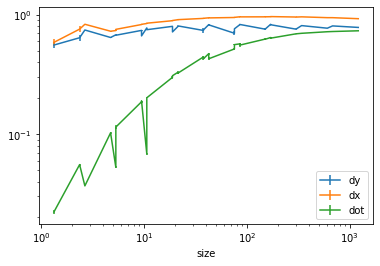

In [9]:
fig=plt.figure()
#print(efficiency)
toPlot=efficiency['dy'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err')
toPlot=efficiency['dx'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err',ax=ax)
toPlot=efficiency['dot'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err',ax=ax)
plt.xscale('log')
plt.yscale('log')
ax.legend(['dy','dx','dot'])

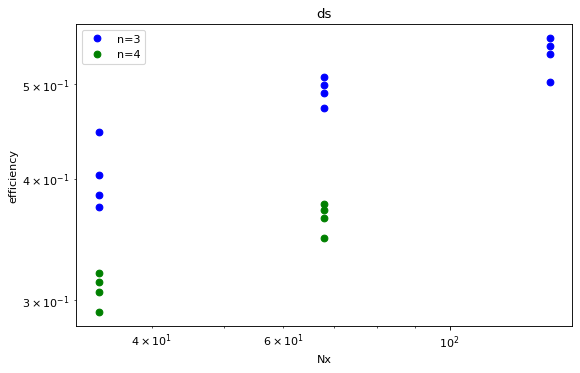

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,5),dpi= 80, facecolor='w', edgecolor='k')
plotlist = [('ds','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
efficiency[efficiency['n']==3].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[1])
efficiency[efficiency['n']==4].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[2])
#plt.loglog()
plt.title(plotlist[0][0])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('efficiency')
plt.xlabel('Nx')
plt.legend(['n=3','n=4'])
plt.show()
#base_bandwidth